# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline 

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [2]:
online_rt = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding='latin1')
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [3]:
#Agrupar o dataframe por país e somar, organizar de forma descendente
df = online_rt.groupby(by='Country').sum().sort_values(by='Quantity',ascending=False)

#Retorna os 10 primeiros exceto UK
first10 = df[df.index != 'United Kingdom'].head(10)
first10

,Quantity,UnitPrice,CustomerID
Country,,,
Netherlands,200128,6492.55,34190538.0
EIRE,142637,48447.19,110391745.0
Germany,117448,37666.00,120075093.0
France,110480,43031.99,107648864.0
Australia,83653,4054.75,15693002.0
Sweden,35637,1806.83,6790083.0
Switzerland,30325,6813.69,23775916.0
Spain,26824,12633.45,32689291.0
Japan,25218,814.86,4567292.0


Text(0, 0.5, 'Quantity')

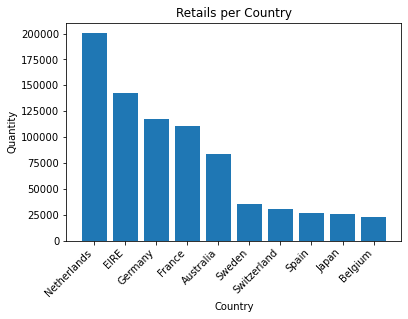

In [4]:
plt.bar(np.arange(len(first10)), first10.Quantity, label='Quantity')
plt.xticks(np.arange(len(first10)), first10.index, rotation='45', ha='right')
plt.title('Retails per Country')
plt.xlabel('Country')
plt.ylabel('Quantity')

Correção do Exercício: forma bem mais simples de plotar

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

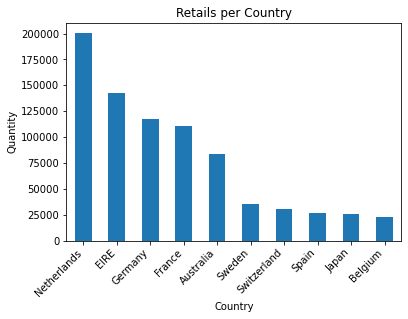

In [5]:
first10['Quantity'].plot(kind='bar')

plt.title('Retails per Country')
plt.ylabel('Quantity')
plt.xticks(rotation='45', ha='right')

### Step 5.  Exclude negative Quantity entries

In [6]:
online_rt = online_rt[online_rt.Quantity >= 0]
online_rt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

In [7]:
top3 = list(first10.head(3).index.values)
top3

['Netherlands', 'EIRE', 'Germany']

In [8]:
step6 = online_rt.query('Country in @top3')

In [9]:
step6_grouped = step6.groupby(by=['CustomerID','Country'], as_index=False).sum()

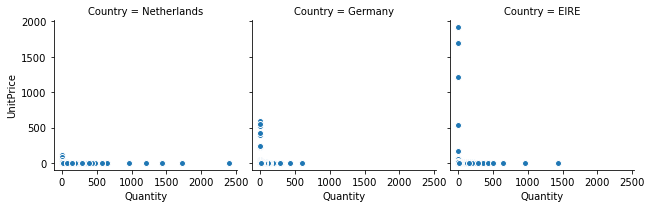

In [10]:
x = sns.FacetGrid(step6, col='Country')
x = x.map(plt.scatter,'Quantity','UnitPrice', edgecolor='w')

Correção do Exercício

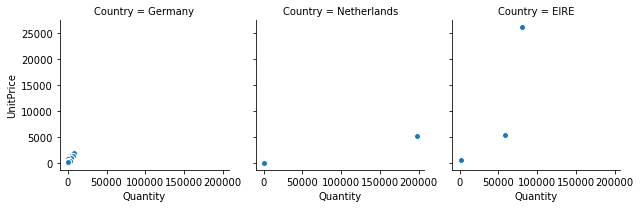

In [11]:
x = sns.FacetGrid(step6_grouped, col='Country')
x = x.map(plt.scatter,'Quantity','UnitPrice', edgecolor='w')

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [12]:
step6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
385,536403,22867,HAND WARMER BIRD DESIGN,96,12/1/10 11:27,1.85,12791.0,Netherlands
386,536403,POST,POSTAGE,1,12/1/10 11:27,15.00,12791.0,Netherlands
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/10 13:04,2.95,12662.0,Germany
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/10 13:04,2.55,12662.0,Germany
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/10 13:04,0.85,12662.0,Germany


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [13]:
#x = sns.FacetGrid(step6, col='Country') cria um Grid em que cada coluna representa um elemento distinto da coluna "Country"

online_rt.UnitPrice.dtype

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [14]:
online_rt[online_rt.CustomerID == 12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


In [15]:
online_rt[online_rt.CustomerID == 12347.0].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland


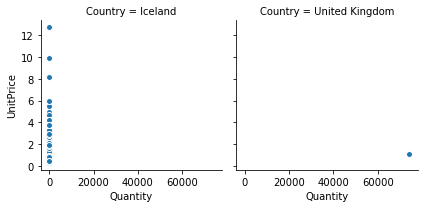

In [16]:
tentativa = online_rt[(online_rt.CustomerID == 12346.0) | (online_rt.CustomerID == 12347.0)]
x = sns.FacetGrid(tentativa, col='Country')
x = x.map(plt.scatter,'Quantity','UnitPrice', edgecolor='w')

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [153]:
#Agrupar por país e somar os valores das quantidades
#Organizar em ordem descrescente
#Obter os três primeiros países, desconsiderando UK

step721 = online_rt.groupby(by='Country').sum().sort_values(by='Quantity',ascending=False)
countries_topsales = step721[step721.index != 'United Kingdom'][:3].index.values
countries_topsales

array(['Netherlands', 'EIRE', 'Germany'], dtype=object)

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [154]:
online_rt['Revenue'] = online_rt['Quantity'] * online_rt['UnitPrice']
online_rt

/home/joaovitorez/miniconda3/envs/env-data-handling/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France,16.60


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [155]:
#Retorno apenas os países do top3, agrupando-os
step732 = online_rt.query('Country in @top3').groupby(by=['CustomerID','Country'], as_index=False)

#Somo apenas as colunas que interessam
step732 = step732['Quantity','Revenue'].sum()

#Acrescento a coluna de AvgPrice
step732['AvgPrice'] = step732['Revenue']/step732['Quantity']
step732

/home/joaovitorez/miniconda3/envs/env-data-handling/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


,CustomerID,Country,Quantity,Revenue,AvgPrice
0,12426.0,Germany,258,582.73,2.258643
1,12427.0,Germany,533,825.80,1.549343
2,12468.0,Germany,366,729.54,1.993279
3,12471.0,Germany,8212,19824.05,2.414034
4,12472.0,Germany,4148,6572.11,1.584405
...,...,...,...,...,...
101,14016.0,EIRE,2125,4341.21,2.042922
102,14156.0,EIRE,57885,117379.63,2.027807
103,14335.0,Germany,379,468.26,1.235515
104,14646.0,Netherlands,197491,280206.02,1.418829


##### Step 7.3.3 Plot

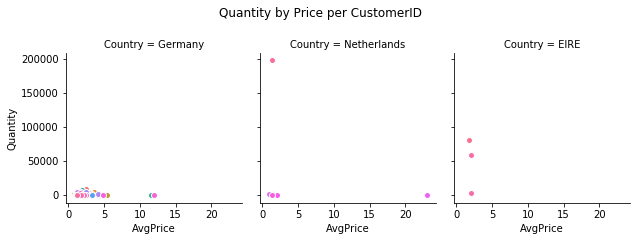

In [156]:
y = sns.FacetGrid(step732, col='Country', hue='CustomerID')
y = y.map(plt.scatter, 'AvgPrice','Quantity',edgecolor='w')
plt.suptitle('Quantity by Price per CustomerID', y=1.1)

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

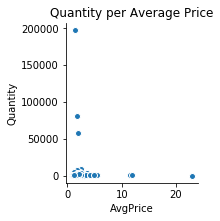

In [157]:
z = sns.FacetGrid(step732)
z = z.map(plt.scatter, 'AvgPrice','Quantity', edgecolor='w')
plt.title('Quantity per Average Price')

##### Step 7.4.2 Zoom in so we can see that curve more clearly

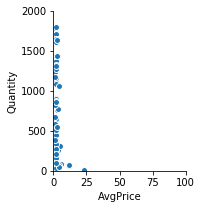

In [158]:
z_zoomed = sns.FacetGrid(step732)
z_zoomed = z_zoomed.map(plt.scatter, 'AvgPrice','Quantity', edgecolor='w').set(xlim=(0, 100), ylim=(0, 2000))

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [159]:
intervals = np.arange(0, 50, 1)

#pd.cut vai seccionar a coluna UnitPrice em intervalos dados por intervals
step8 = online_rt.groupby(pd.cut(online_rt.UnitPrice, intervals))['Revenue','Quantity'].sum()
step8.head()

/home/joaovitorez/miniconda3/envs/env-data-handling/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Revenue,Quantity
UnitPrice,,
"(0, 1]",1.107775e+06,2123919
"(1, 2]",2.691765e+06,1841466
"(2, 3]",2.024143e+06,837931
"(3, 4]",8.651018e+05,243381
"(4, 5]",1.219377e+06,269647


#### 8.3 Plot.

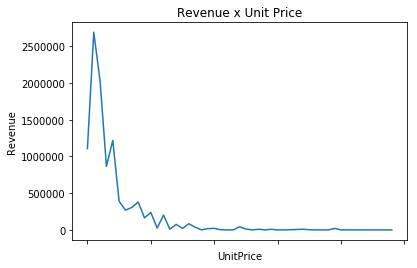

In [160]:
step8.Revenue.plot()
plt.title('Revenue x Unit Price')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

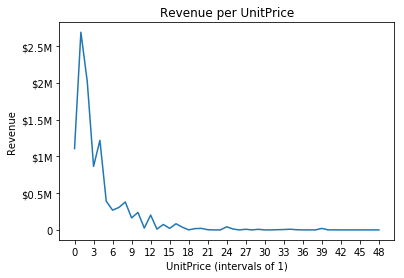

In [161]:
step8.Revenue.plot()

#Colocar valores de UnitPrice no eixo X 
plt.xticks(np.arange(0,50,3), np.arange(0,50,3))

plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])

plt.xlabel('UnitPrice (intervals of 1)')
plt.ylabel('Revenue')
plt.title('Revenue per UnitPrice')
plt.show()

### BONUS: Create your own question and answer it.

#### Calcula média de receita por continente

In [162]:
#Divisão em continentes

Europa = ['United Kingdom','Germany','France','Spain','Netherlands','Belgium',
        'Switzerland','Portugal','EIRE','Norway','Italy','Channel Islands',
        'Finland','Cyprus','Sweden','Austria','Denmark','Poland','Iceland',
        'Greece','Malta','European Community','Lithuania','Czech Republic']

Asia = ['Japan','Israel','Hong Kong','Singapore','United Arab Emirates',
        'Lebanon','Bahrain','Saudi Arabia']

America = ['America US','Canada','Brazil']

Oceania = ['Australia']

Unspecified = ['Unspecified']

Africa = ['RSA']

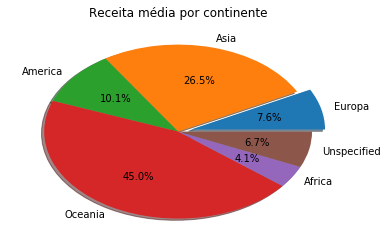

In [163]:
labels = ['Europa', 'Asia', 'America', 'Oceania', 'Africa', 'Unspecified']

eu_rev = online_rt.query('Country in @Europa').Revenue.mean()
asi_rev = online_rt.query('Country in @Asia').Revenue.mean()
ame_rev = online_rt.query('Country in @America').Revenue.mean()
oce_rev = online_rt.query('Country in @Oceania').Revenue.mean()
unsp_rev = online_rt.query('Country in @Unspecified').Revenue.mean()
afr_rev = online_rt.query('Country in @Africa').Revenue.mean()

slices = [eu_rev, asi_rev, ame_rev, oce_rev, unsp_rev, afr_rev]
explode = (0.1,0,0,0,0,0)
plt.pie(slices, labels=labels, explode=explode, 
        autopct='%1.1f%%',shadow=True)
plt.title('Receita média por continente')

Muito curioso que, embora a receita total da Europa seja absurdamente maior, a receita média não é tão expressiva frente a continentes como Oceania e Asia. Minha hipótese é de que os produtos  desse continente têm baixo valor agregado,
ou seja, embora a receita seja enorme, a quantidade de produtos vendidos também foi, o que é diferente para a Oceania, em que um só país foi capaz de obter a maior receita média entre os continentes.
